In [132]:
#Perform standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
ds = pd.read_csv('Social_Network_Ads.csv')

In [134]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [135]:
X = ds[['Age','EstimatedSalary']].values
y = ds['Purchased'].values

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
X = StandardScaler().fit(X).transform(X)

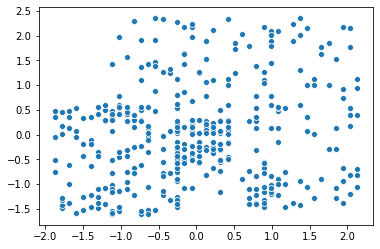

In [138]:
sns.scatterplot(X[:,0],X[:,1])

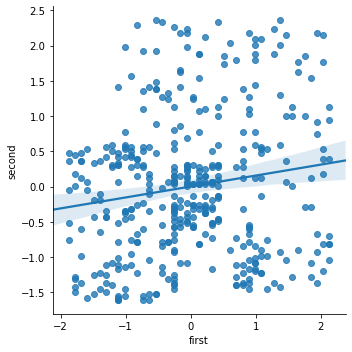

In [139]:
sns.lmplot('first','second', pd.DataFrame(X,columns=['first','second']))


In [140]:
from sklearn.decomposition import KernelPCA

In [141]:
kpca = KernelPCA(n_components=2,kernel='rbf')

In [142]:
X = kpca.fit(X).transform(X)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

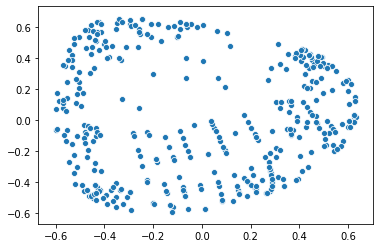

In [145]:
sns.scatterplot(X[:,0],X[:,1])

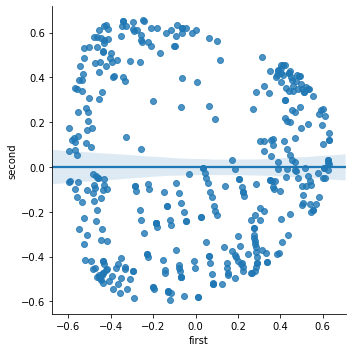

In [146]:
sns.lmplot('first','second', pd.DataFrame(X,columns=['first','second']))


In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
classifier = LogisticRegression(random_state=0)

In [149]:
classifier.fit(X_train,y_train)

C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
y_pred = classifier.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
confusion_matrix(y_test,y_pred)

array([[76,  4],
       [11, 41]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


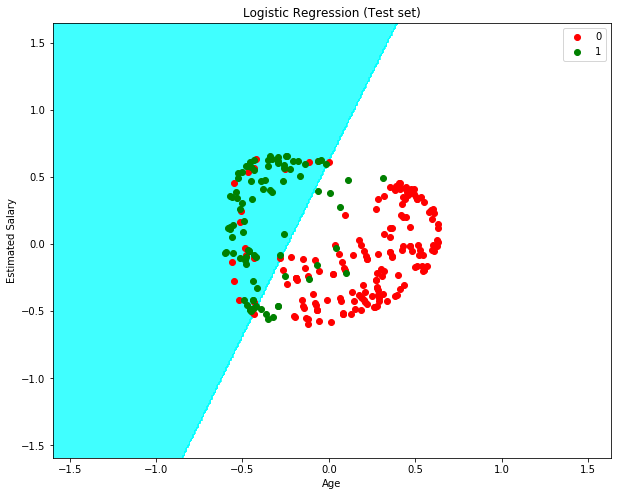

In [153]:
# Visualising the Training set results
plt.figure(figsize=(10,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white','cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()